# LTAT.02.006 Andmeteaduse meetodid, sügis 2025

# 2. kodutöö

## Tähtaeg: esmaspäev, 6. oktoober, kell 12:00 (keskpäeval)


### Kodutöö reeglid

Palun kontrollige üle kodutööde reeglid esimesest kodutööst, samad reeglid kehtivad siin.

### Palun lugege kokku kodutööle kulunud aeg ning kommentaarid ülesannete kohta (kui neid tekib)

Palume, et loeksite kokku kodutööle kulunud aja, eriti hea kui ka eraldi iga ülesande peale kulunud aja. Eraldi ülesannete alapunktide kaupa pole aega vaja eristada. Kulunud aeg kirjutage palun selleks mõeldud lahtritesse kodutöö lõpus. See ei ole kohustuslik ega mõjuta hinnet, kuid aitab kodutöid paremaks teha. Kui teil on ülesannete kohta tagasisidet anda (miski oli väga keeruline, raske aru saada, segane või just väga huvitav), siis saate sellest samuti kodutöö lõppu kirjutada.


# 1. ülesanne. Andmete võltsimise tuvastamine (2 punkti)


2021\. aasta augustis avaldati [blogipostitus](https://datacolada.org/98) (võid alguses lugemata jätta, kui tahad ülesannete käigus rohkem üllatunud olla 🙂), kus tulid ilmsiks tõsised kahtlused akadeemilise petturluse (konkreetsemalt andmete võltsimise) kohta ühes 2012\. aastal avaldatud eksperimentaalse psühholoogia valdkonna artiklis. Artiklis uuriti ausust, analüüsides selleks ühe kindlustusfirma autokindlustuse andmeid. Artiklis väideti, et inimeste aususes on oluline erinevus sõltuvalt sellest, kas korrektsete andmete esitamist on allkirjaga kinnitatud enne või pärast andmevormi täitmist.
Uuritavateks andmeteks olid inimeste poolt raporteeritud sõiduki läbisõidud (hetke odomeetri näit miilides). Täpsemalt selgus, et inimesed, kes pidid enne ankeedi täitmist panema linnukese lahtrisse 'Luban, et andmed on korrektsed', raporteerisid oma sõiduki läbisõiduks keskmiselt üle 2400 miili rohkem kui need, kes pidid analoogse lahtri täitma peale ankeedi täitmist. Paraku pole hiljem seda tulemust suudetud korrata ning 2021. aastal avaldati originaalandmed, mille põhjal on alust arvata, et alusandmed olid osaliselt fabritseeritud.

Selles ülesandes järgimegi protsessi, mida senini anonüümseks jäänud uurijad andmete võltsimise juhtumi tuvastamiseks läbi viisid.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


In [2]:
# Added types :)

from typing import List


In [3]:
df = pd.read_csv("yl1.csv", sep=";")
df.head()


,allkirja_positsioon,ID,auto1_varem,auto1_hiljem,auto2_varem,auto2_hiljem,auto3_varem,auto3_hiljem,auto4_varem,auto4_hiljem,varem_keskmine,hiljem_keskmine,vahepealne_keskmine_labisoit,auto1_indikaator,auto2_indikaator,auto3_indikaator,auto3_indikaator.1,autode_arv
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0,1,0,0,0,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5,1,1,0,0,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0,1,1,0,0,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0,1,0,0,0,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0,1,0,0,0,1


In [4]:
# Hiljem = (kindlustuslepingu uuendamisel?) aususe allkirja andmisel kirjutatud odo näit
# Varem = kindlustuslepingu alguses kirja pandud odo näit


Iga rida vastab ühe kindlustustaotleja andmetele. Veerus `allkirja_positsioon` on kirjas, kas taotleja täitis aususeavalduse ankeedi alguses või lõpus. Veerg `ID` sisaldab kindlustusepakkuja ettevõttesisest identifikaatorit ja on meie jaoks ebaoluline. Järgmised veerud sisaldavad põhilisi andmeid. Igal taotlejal oli kirjas kuni neli erinevat autot, mille läbisõitu (odomeetri hetke näit) ta raporteerima pidi. Iga auto kohta on kirjas `_varem` ja `_hiljem` veerud, mõlemad näitavad milline oli auto läbisõit teatud hetkel. `_varem` veergudes on kirjas auto varasemalt raporteeritud läbisõit (nö ajapunktil 1, mis võis olla aastaid varem), `_hiljem` veergudes on kirjas samuti samade autode läbisõit, aga hilisemal ajal, st ajal kui uuringut läbi viidi. `_hiljem` veergudes olevate andmete puhul küsiti allkirja aususe kohta kas ankeedi alguses või lõpus.

Lisaks on andmetes keskmiste veerud `varem_keskmine`, `hiljem_keskmine` ja `vahepealne_keskmine_labisoit`. Veergu `varem_keskmine` on märgitud iga inimese jaoks kõikide tema autode keskmine läbisõit varasemalt. Veergu `hiljem_keskmine` on märgitud iga inimese jaoks tema autode keskmine läbisõit hilisemal küsitlusel. Aususe analüüs viidi läbi tunnuse `vahepealne_keskmine_labisoit` põhjal, mis sisaldab kahe keskmise vahelist erinevust (`hiljem_keskmine` - `varem_keskmine`), ehk iga inimese autode keskmist läbisõitu kahe küsitluse vahepealsel ajal. (Lisainfo: miks just sellise tunnuse põhjal ausust uuriti, kui loogiliselt võttes saaks ka teha ainult `hiljem_keskmine` veeru põhjal, me öelda ei oska, aga mõlema puhul saab ausust uurida).

Viimased tulbad on indikaatortulbad `autoX_indikaator`, mis näitavad, kas inimesel oli auto nr `X` olemas, ning tulp `autode_arv`, mis näitab, kui palju autosid igal inimesel oli.

See tabel on 2012. aasta originaalartiklis kasutatud andmete põhjal loodud, ainuke erinevus on tulpade nimede muutmine ja csv-formaati teisendamine.


<font color='purple'>**(a) Veenduge, et `varem_keskmine`, `hiljem_keskmine`, `vahepealne_keskmine_labisoit` tulbad on korrektselt leitud.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Leidke iga inimese (rea) jaoks varasem autode keskmine läbisõit (st `autoX_varem` tulbad).**</font>

2. <font color='purple'>**Leidke iga inimese jaoks hilisem autode keskmine läbisõit (st `autoX_hiljem` tulbad).**</font>

3. <font color='purple'>**Võrrelge ise arvutatud keskmisi veergudega `varem_keskmine`, `hiljem_keskmine`. Viimasena saate arvutatud veergude vahet võrrelda `vahepealne_keskmine_labisoit` veeruga.**</font>

<font color='purple'>**OODATUD TULEMUS: On leitud keskmised läbisõidud reakaupa. On näidatud, et ise arvutatud ja failis olnud `_keskmine` veergude erinevus on nullilähedane.**</font>

VIHJED:

-   Keskmiseid saab kiirelt leida, kasutades `pandas.DataFrame.mean()` või `np.mean()`, sobiva `axis` argumendi valikuga.
-   Ise arvutatud veergude võrdlemisel failis olnud veergudega ei saa reahaaval võrdumist kontrollida, kuna tegu on ujukomaarvudega. Selle asemel võib võrrelda maksimaalset erinevust arvutatud ja failis olnud veergude vahel. Kasuks tulevad meetodid `np.abs()` ja `np.max()` või `pd.Series.abs()` ja `pd.Series.max()`

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [5]:
# Lahendus palun siia (siin ja edaspidi võib selle kommentaari kustutada
# ning samuti võib ka ise tekstivälju ja koodivälju juurde teha, kuid
# muid etteantud välju kustutada ei tohi).


In [6]:
# 1
#	Leidke iga inimese (rea) jaoks varasem autode keskmine läbisõit (st `autoX_varem` tulbad)

# Numpy mean
#autoX_varem_EX: List[float] = [
#	np.mean(df[f"auto{i+1}_varem"]) for i in range(4)
#]

autoX_varem_EX = df[["auto1_varem", "auto2_varem", "auto3_varem", "auto4_varem"]].mean(axis=1).tolist()


In [7]:
#autoX_varem_EX


In [8]:
# 2
# 	Leidke iga inimese jaoks hilisem autode keskmine läbisõit (st `autoX_hiljem` tulbad).

# Pandas DF mean
#autoX_hiljem_EX: List[float] = [
#	df[f"auto{i+1}_hiljem"].mean() for i in range(4)
#]


autoX_hiljem_EX = df[["auto1_hiljem", "auto2_hiljem", "auto3_hiljem", "auto4_hiljem"]].mean(axis=1).tolist()


In [9]:
#autoX_hiljem_EX


In [10]:
#Ise arvutatud veergude võrdlemisel failis olnud veergudega ei saa reahaaval võrdumist kontrollida, kuna tegu on ujukomaarvudega. Selle asemel võib võrrelda maksimaalset erinevust arvutatud ja failis olnud veergude vahel. Kasuks tulevad meetodid `np.abs()` ja `np.max()` või `pd.Series.abs()` ja `pd.Series.max()`


In [11]:
# 3
# 	Võrrelge ise arvutatud keskmisi veergudega `varem_keskmine`, `hiljem_keskmine`. Viimasena saate arvutatud veergude vahet võrrelda `vahepealne_keskmine_labisoit` veeruga.

varem_keskmine = np.max(np.abs(df.varem_keskmine)) # df.varem_keskmine.mean() või np.mean() või df.varem_keskmine.sum() / len(df.varem_keskmine)
hiljem_keskmine = np.max(np.abs(df.hiljem_keskmine))

autoX_varem_EX_kogu = np.max(np.abs(autoX_varem_EX))
autoX_hiljem_EX_kogu = np.max(np.abs(autoX_hiljem_EX))

print("Max EX:")
print("\t\tvarem", "\t\thiljem")
print("Algandmetest:\t", varem_keskmine, "\t", hiljem_keskmine)
print("Minu andmed:\t", autoX_varem_EX_kogu, "\t", autoX_hiljem_EX_kogu)
print("Erinevus:\t", varem_keskmine-autoX_varem_EX_kogu, "\t\t", hiljem_keskmine-autoX_hiljem_EX_kogu)

max_pos = df.vahepealne_keskmine_labisoit.abs().idxmax()  #.to_numpy().argmax()

vahepealne_keskmine_labisoit = df.vahepealne_keskmine_labisoit.iloc[max_pos]
autoX_vahepealne_keskmine_labisoit = autoX_hiljem_EX[max_pos] - autoX_varem_EX[max_pos]


print("\nMax vahepealne_keskmine_labisoit:")
print("Algandmetest:\t", vahepealne_keskmine_labisoit)
print("Minu andmed:\t", autoX_vahepealne_keskmine_labisoit)
print("Erinevus:\t", autoX_vahepealne_keskmine_labisoit-vahepealne_keskmine_labisoit,)


Max EX:
		varem 		hiljem
Algandmetest:	 983155.0 	 1010893.0
Minu andmed:	 983155.0 	 1010893.0
Erinevus:	 0.0 		 0.0

Max vahepealne_keskmine_labisoit:
Algandmetest:	 49997.0
Minu andmed:	 49997.0
Erinevus:	 0.0


In [12]:
# Kas siin ei tohi mean väärtusi võrrelda?

# df.varem_keskmine.mean() või np.mean() või df.varem_keskmine.sum() / len(df.varem_keskmine)
(varem_keskmine, hiljem_keskmine) = df.varem_keskmine.mean(), df.hiljem_keskmine.mean()

(autoX_varem_EX_kogu, autoX_hiljem_EX_kogu) = np.mean(autoX_varem_EX), np.mean(autoX_hiljem_EX)

print("\t\tvarem", "\t\t\thiljem")
print("Algandmetest:\t", varem_keskmine, "\t", hiljem_keskmine)
print("Minu andmed:\t", autoX_varem_EX_kogu, "\t", autoX_hiljem_EX_kogu)
print("Erinevus:\t", varem_keskmine-autoX_varem_EX_kogu, "\t\t\t", hiljem_keskmine-autoX_hiljem_EX_kogu)


		varem 			hiljem
Algandmetest:	 67272.60660710755 	 92171.52545472518
Minu andmed:	 67272.60660710755 	 92171.52545472518
Erinevus:	 0.0 			 0.0


<font color='purple'>**(b) Kõigepealt võiksime uurida originaalartikli põhilist väidet, et allkirja positsioonist sõltub, kui ausalt inimesed andmeid märgivad. Uuringus vaadati just vahepealse perioodi keskmist läbisõitu nii üles kui alla allkirja andnud inimeste puhul.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Leidke veeru `vahepealne_keskmine_labisoit` keskmine mõlema uuringus osalenud grupi jaoks, st ankeedi ülaosas aususeavalduse täitnute jaoks ja ankeedi alaosas täitnute jaoks.**</font>

2. <font color='purple'>**Joonistage ühele joonisele kaks histogrammi veeru `vahepealne_keskmine_labisoit` jaoks: üks histogramm nende taotlejate kohta, kelle allkirja positsioon on ankeedi ülevalosas ja teine nende kohta, kelle allkirja positsioon on ankeedi allosas.**</font>

<font color='purple'>**OODATUD TULEMUS: 2 arvu, 1 joonis.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [13]:
# 1
#	Leidke veeru `vahepealne_keskmine_labisoit` keskmine mõlema uuringus osalenud grupi jaoks, st ankeedi ülaosas aususeavalduse täitnute jaoks ja ankeedi alaosas täitnute jaoks.

# df.where(df["allkirja_positsioon"] == "Sign Top") - HALB kirjutab teised väljad NaN
# df.loc[df["allkirja_positsioon"] == "Sign Bottom"] === df[df["allkirja_positsioon"] == "Sign Top"]

df_sig_top = df[df["allkirja_positsioon"] == "Sign Top"]
df_sig_bottom = df[df["allkirja_positsioon"] == "Sign Bottom"]

vahepealne_keskmine_labisoit_sig_top = df_sig_top.vahepealne_keskmine_labisoit.mean()
vahepealne_keskmine_labisoit_sig_bottom = df_sig_bottom.vahepealne_keskmine_labisoit.mean()


In [14]:
#df_sig_top.head()
#df_sig_bottom.head()


In [15]:
vahepealne_keskmine_labisoit_sig_top, vahepealne_keskmine_labisoit_sig_bottom


(np.float64(26098.398874071907), np.float64(23670.639780912366))

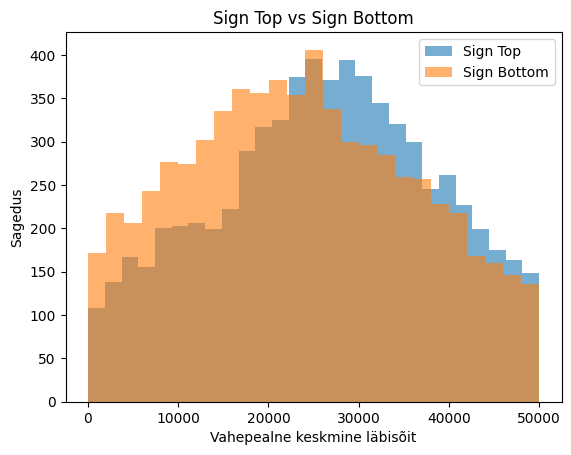

In [16]:
# 2
#	Joonistage ühele joonisele kaks histogrammi veeru `vahepealne_keskmine_labisoit` jaoks: üks histogramm nende taotlejate kohta, kelle allkirja positsioon on ankeedi ülevalosas ja teine nende kohta, kelle allkirja positsioon on ankeedi allosas.


#plt.axvline(vahepealne_keskmine_labisoit_sig_top, color="blue", linestyle="dashed", linewidth=1)
#plt.axvline(vahepealne_keskmine_labisoit_sig_bottom, color="orange", linestyle="dashed", linewidth=1)

plt.hist(df_sig_top["vahepealne_keskmine_labisoit"], bins='auto', alpha=0.6, label="Sign Top")
plt.hist(df_sig_bottom["vahepealne_keskmine_labisoit"], bins='auto', alpha=0.6, label="Sign Bottom")

plt.xlabel("Vahepealne keskmine läbisõit")
plt.ylabel("Sagedus")
plt.title("Sign Top vs Sign Bottom")
plt.legend()
plt.show()


<font color='purple'>**(c) Eelmises ülesandes visualiseerisime klientide keskmised läbisõidud kahe küsitluse vahepealsel perioodil. Milline võiks juhuslikult valitud autode läbisõidu jaotus päriselt olla? Võid veidi guugeldada ja uurida (ka blogipostituses on veidi mainitud) ning kirjeldada paari lausega.**  
_(**NB!** Siin on oodatud seda, millised need väärtused peaksid päriselt olema, mitte andmete põhjal vaadatuna.)_</font>

<font color='purple'>**Võid mõelda kirjelduse koostamisel:**</font>

-   <font color='purple'>**mis võiks olla minimaalne ja maksimaalne läbisõit (miilides), ei pea siin proovima õigesti vastata, vaid umbes mõelda, et mis võiks olla ühe sõitva auto maksimaalne ja minimaalne läbisõit;**</font>

-   <font color='purple'>**umbes millisesse sõidetud miilide vahemikku võiks kõige rohkem autosid jääda;**</font>

-   <font color='purple'>**milliste sõidetud miilide vahemikus võiks autode arv olla null;**</font>

-   <font color='purple'>**milline võiks olla jaotuse profiili kuju (nt ühtlane, stabiilselt kasvav, ühe kitsa ja kõrge piigiga, mitme lauge piigiga, jne).**</font>

<font color='purple'>**OODATUD TULEMUS: vastused küsimusele.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


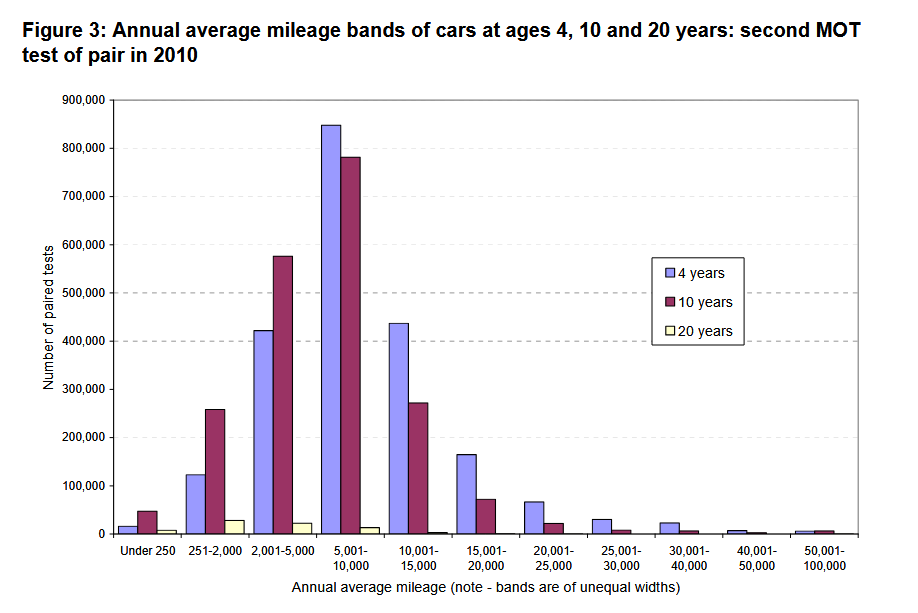

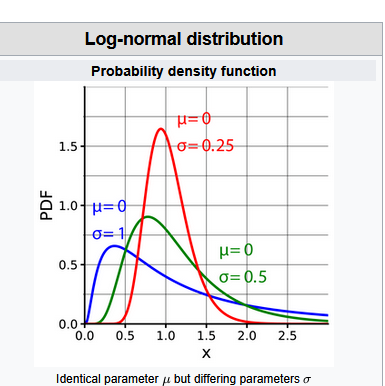

Log-nomraaljaotus?

_As we might expect, we see that some people drive a whole lot, some people drive very little, and most people drive a moderate amount._

**mis võiks olla minimaalne ja maksimaalne läbisõit (miilides), ei pea siin proovima õigesti vastata, vaid umbes mõelda, et mis võiks olla ühe sõitva auto maksimaalne ja minimaalne läbisõit;**

1 aastas võiks maksimum olla nt 365 päeva, 24h sõitu, keskmine kiirus nt 90km/h kui maanteel.
24 x 90 x 365 = 788 400km ehk 489 889.048 miili kui keegi sõidab 24/7/365 maanteel :D
miinimum võib ikka olla 0 kuna osad eelsitavad ühistransporti kui vähegi võimalik.

**umbes millisesse sõidetud miilide vahemikku võiks kõige rohkem autosid jääda;**

2000 - 15 000 miili

**milliste sõidetud miilide vahemikus võiks autode arv olla null;**

rohkem kui realistlikult on võimalik nt 400k miili või siis midagi realistlikumt nt 100 000 miili

**milline võiks olla jaotuse profiili kuju (nt ühtlane, stabiilselt kasvav, ühe kitsa ja kõrge piigiga, mitme lauge piigiga, jne).**

ühe suure piigiga


<font color='purple'>**(d) Koostage neli histogrammi, igale histogrammile kandke ühe `_varem` veeru autode sõidetud miilide jaotus. St üks diagramm veeru `auto1_varem` jaoks, teine `auto2_varem` jaoks jne.**</font>

<font color='purple'>**OODATUD TULEMUS: joonis, selgitus, kas ja miks tundub usutav või mitte (1-2 lauset)**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [17]:
df["auto1_varem"].describe()

count     13488.000000
mean      67356.428381
std       56761.319730
min           0.000000
25%       25274.000000
50%       56341.500000
75%       96259.250000
max      983155.000000
Name: auto1_varem, dtype: float64

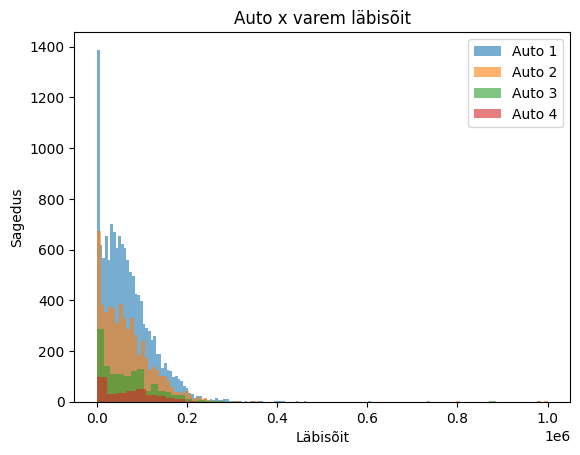

In [18]:
# Kõik näeb ju ilus välja
# aga skaala mega imelik :D


plt.hist(df["auto1_varem"], bins='auto', alpha=0.6, label="Auto 1")
plt.hist(df["auto2_varem"], bins='auto', alpha=0.6, label="Auto 2")
plt.hist(df["auto3_varem"], bins='auto', alpha=0.6, label="Auto 3")
plt.hist(df["auto4_varem"], bins='auto', alpha=0.6, label="Auto 4")


plt.xlabel("Läbisõit")
plt.ylabel("Sagedus")
plt.title("Auto x varem läbisõit")
plt.legend()
plt.show()

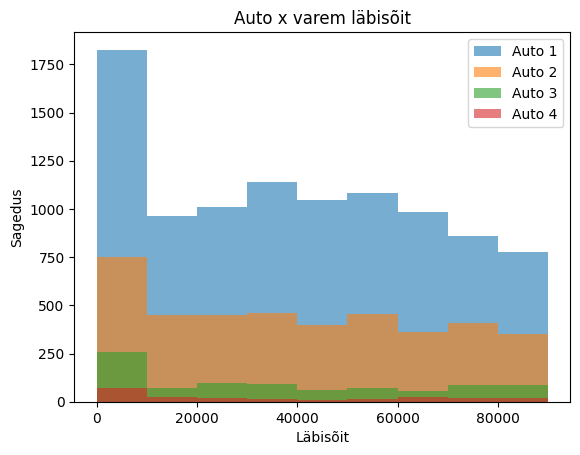

In [19]:
bins = [int(f"{i}0000") for i in range(10)]

plt.hist(df["auto1_varem"], bins=bins, alpha=0.6, label="Auto 1")
plt.hist(df["auto2_varem"], bins=bins, alpha=0.6, label="Auto 2")
plt.hist(df["auto3_varem"], bins=bins, alpha=0.6, label="Auto 3")
plt.hist(df["auto4_varem"], bins=bins, alpha=0.6, label="Auto 4")


plt.xlabel("Läbisõit")
plt.ylabel("Sagedus")
plt.title("Auto x varem läbisõit")
plt.legend()
plt.show()

(Vastus palun siia)

Ei ole väga usutav, sest väga ühtlane on teatud vahemikus 0-90k miili ja eriti autod 3 ja 4.
Liiga pidev jaotus on kuidagi ja null väärtusi väga palju. Algselt võis ka palju uusi autosid olla kindlustluslepingu teinud aga ikkagi tunub kahtlane.


<font color='purple'>**(e) Koostage neli histogrammi, igale histogrammile kandke ühe `_hiljem` veeru autode sõidetud miilide jaotus. S.t. üks diagramm veeru `auto1_hiljem` jaoks, teine `auto2_hiljem` jaoks jne.**</font>

<font color='purple'>**OODATUD TULEMUS: joonis, selgitus, kas ja miks tundub usutav või mitte (1-2 lauset)**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


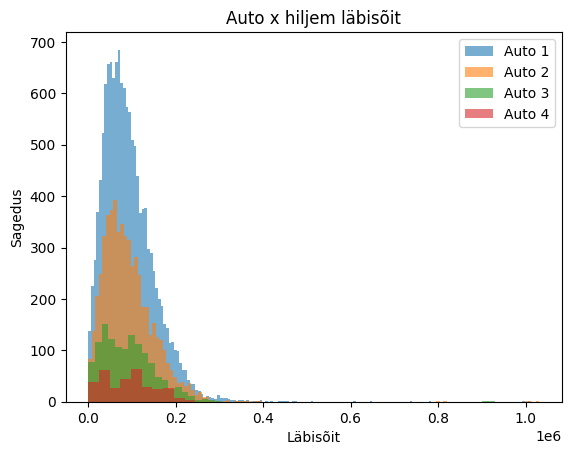

In [20]:
plt.hist(df["auto1_hiljem"], bins='auto', alpha=0.6, label="Auto 1")
plt.hist(df["auto2_hiljem"], bins='auto', alpha=0.6, label="Auto 2")
plt.hist(df["auto3_hiljem"], bins='auto', alpha=0.6, label="Auto 3")
plt.hist(df["auto4_hiljem"], bins='auto', alpha=0.6, label="Auto 4")


plt.xlabel("Läbisõit")
plt.ylabel("Sagedus")
plt.title("Auto x hiljem läbisõit")
plt.legend()
plt.show()

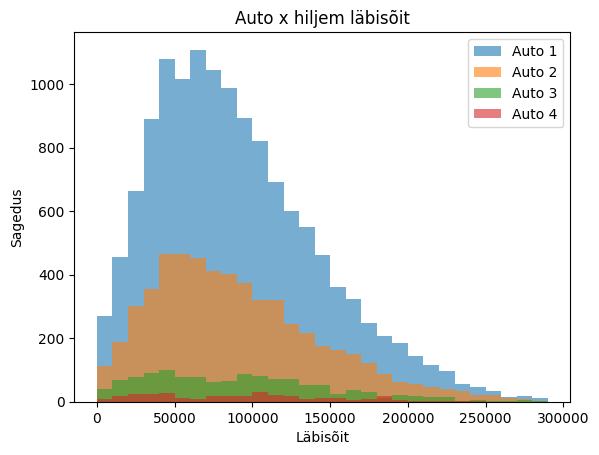

In [21]:
# Lahendus

bins = [int(f"{i}0000") for i in range(30)]

plt.hist(df["auto1_hiljem"], bins=bins, alpha=0.6, label="Auto 1")
plt.hist(df["auto2_hiljem"], bins=bins, alpha=0.6, label="Auto 2")
plt.hist(df["auto3_hiljem"], bins=bins, alpha=0.6, label="Auto 3")
plt.hist(df["auto4_hiljem"], bins=bins, alpha=0.6, label="Auto 4")


plt.xlabel("Läbisõit")
plt.ylabel("Sagedus")
plt.title("Auto x hiljem läbisõit")
plt.legend()
plt.show()

(Vastus palun siia)

Pigem ei ole usutav, sest autod 3 ja 4 on väga kahtlased.

Liiga pidev jaotus on kuidagi neil.


<font color='purple'>**(f) Koostage neli histogrammi, igale histogrammile kandke vahe `_hiljem` ja `_varem` veergude vahel. S.t. üks diagramm veeru `auto1_hiljem` ja `auto1_varem` vahe jaoks jne. Nende kahe tunnuse vahe tähistab seda, kui palju auto nende kahe küsitluse vahel on sõitnud.**</font>

<font color='purple'>**OODATUD TULEMUS: joonis, selgitus, kas ja miks tundub usutav või mitte (1-2 lauset)**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


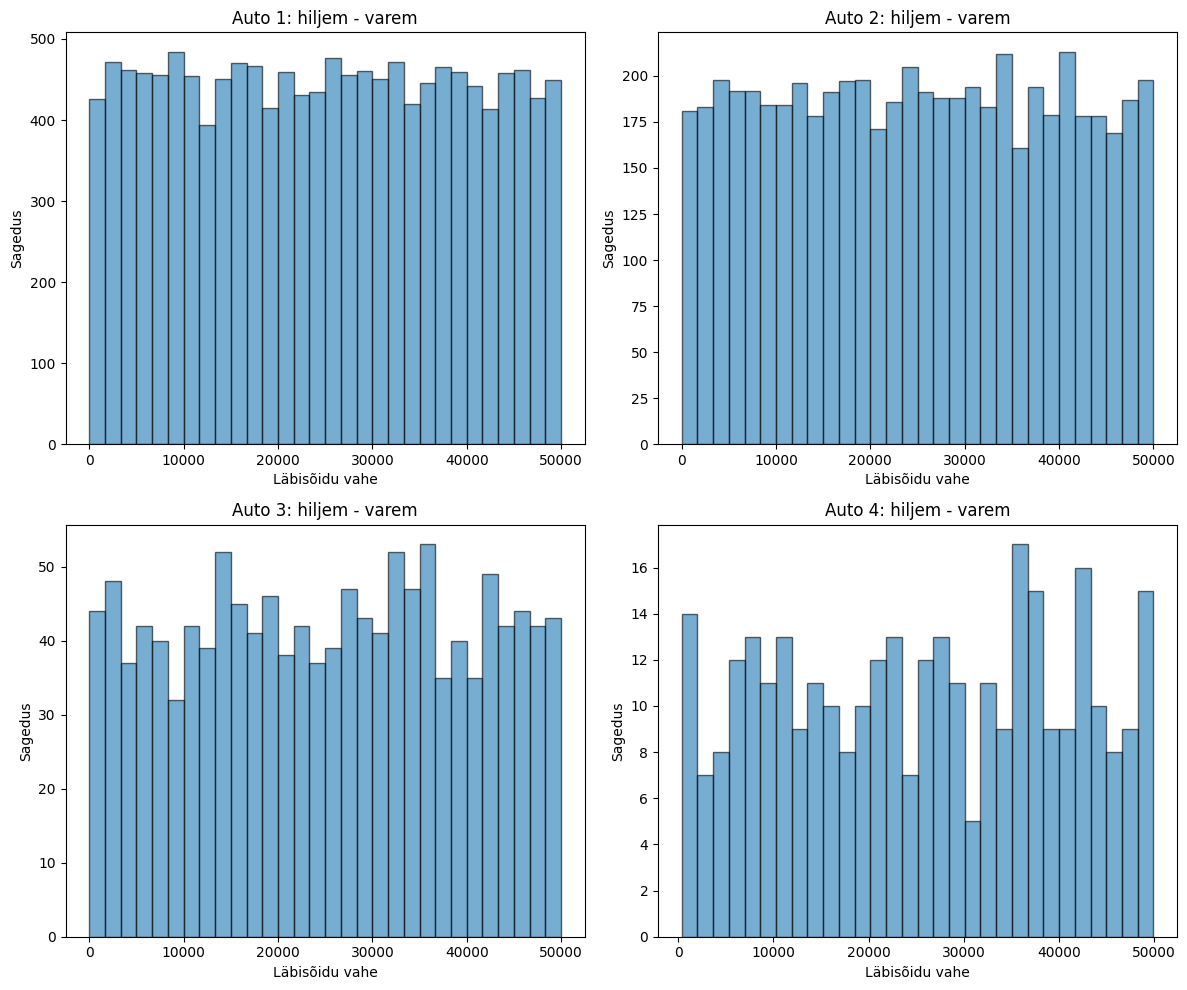

In [22]:
# Lahendus


autod = [1, 2, 3, 4]
plt.figure(figsize=(12, 10))

for i, auto in enumerate(autod, 1):
    varem = df[f"auto{auto}_varem"]
    hiljem = df[f"auto{auto}_hiljem"]

    vahe = (hiljem - varem).dropna()

    plt.subplot(2, 2, i)
    plt.hist(vahe, bins=30, alpha=0.6, edgecolor='black')
    plt.xlabel("Läbisõidu vahe")
    plt.ylabel("Sagedus")
    plt.title(f"Auto {auto}: hiljem - varem")

plt.tight_layout()
plt.show()

(Vastus palun siia)

Ei ole usutav kuna väga pidev jaotus on, eriti autod 1 ja 2. Liiga perfektne on kõik.


Loodetavasti nägite eelmiste ülsannete jooksul, et andmetega ei ole kõik korras. On ka teine võimalus petturluse tuvastamiseks. Saame jälgida sõidetud miilide viimase numbri jaotust (nt kui auto on sõitnud 4321 miili, siis selle auto sõidetud miilide viimane number on 1). Ausas uurimuses võiks sõidetud miilide arvu viimase numbri jaotus olla sarnane nii `_varem` kui ka `_hiljem` veergudes, kuna kliendid on pidanud märkima sama asja - odomeetri näidu - lihtsalt erinevatel ajahetkedel.

<font color='purple'>**(g) Joonistage `_varem` veergudes olevate autode viimase numbri jaotus. Seekord ei ole vaja nelja eri graafikut, vaid tehke üks massiiv kõigist neljast veerust. Seejärel leidke selles massiivis viimase numbri jaotus ja kandke tulpdiagrammile.**</font>

<font color='purple'>**OODATUD TULEMUS: Üks tulpdiagramm, kus on kõikide autode `_varem` veerus viimase numbri jaotus.**</font>

VIHJE:

-   Nelja tulba agregeerimiseks uurige `np.flatten()` või `np.ravel()` meetodeid.

-   Viimase numbri leidmiseks saab Pythoni `modulo` operaatorit `%` rakendada NumPy massiivile või pandase objektidele rakendada elemendikaupa.

-   Kui iga massiivi elemendi jaoks on viimane number leitud, tuleb veenduda, et tegu on `int` või `np.int` tüüpi objektiga! Vajadusel tuleb need viimased numbrid konverteerida täisarvudeks.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


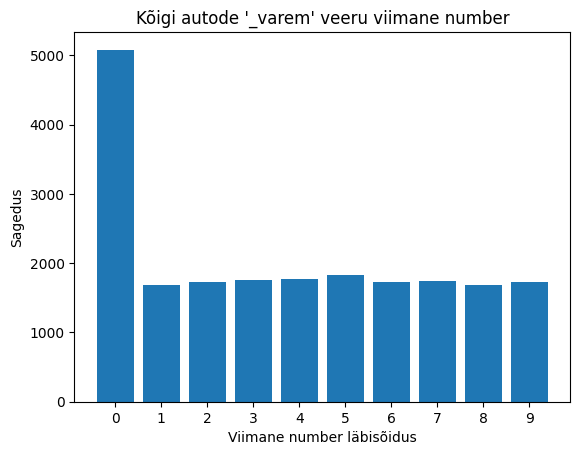

In [23]:
# Lahendus

veerud = ["auto1_varem", "auto2_varem", "auto3_varem", "auto4_varem"]

# Miks dropna() liiga palju dropib???
df_veerud = df[veerud] #.dropna()

# df[veerud].dropna().values.flatten() - ei tööta? dropna() viskab liiga palju välja??? :D
andmed = df_veerud[veerud].values.flatten() # df[veerud].values.ravel() või np.ravel(df[veerud]) või df[veerud].values
# ravel peaks parem olema kuna ei tee deep copy orig array-st
# siit saame nupy 2d array

# Kui seda ei tee saab kahtlased andmed aga mai saa aru miks :D
andmed = andmed[~np.isnan(andmed)]
andmed = andmed.astype(int)

#print(andmed)

viimased_numbrid = andmed % 10


bins = np.bincount(viimased_numbrid, minlength=10)

plt.bar(range(10), bins)
plt.xlabel("Viimane number läbisõidus")
plt.ylabel("Sagedus")
plt.title("Kõigi autode '_varem' veeru viimane number")
plt.xticks(range(10))
plt.show()

<font color='purple'>**(h) Joonistage `_hiljem` veerus olevate autode viimase numbri jaotus. Siin ka ei ole vaja nelja eri graafikut, vaid tehke üks massiiv kõigist neljast veerust. Seejärel leidke selles massiivis viimase numbri jaotus ja kandke tulpdiagrammile.**</font>

<font color='purple'>**OODATUD TULEMUS: Üks tulpdiagramm, kus on kõikide `_hiljem` veerus olevate autode viimase numbri jaotus.**</font>

VIHJE:

-   Sama protsess, mis eelmises alapunktis.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


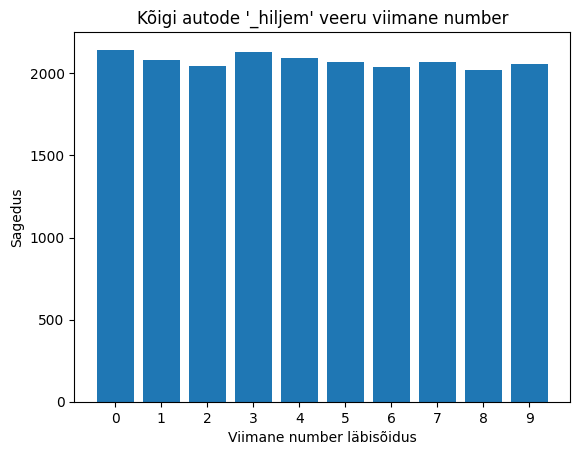

In [24]:
# Lahendus


# Lahendus

veerud = ["auto1_hiljem", "auto2_hiljem", "auto3_hiljem", "auto4_hiljem"]

# df[veerud].dropna().values.flatten() - ei tööta? dropna() viskab liiga palju välja??? :D
andmed = df[veerud].values.flatten() # df[veerud].values.ravel() või np.ravel(df[veerud]) või df[veerud].values
# ravel peaks parem olema kuna ei tee deep copy-t orig array-st

andmed = andmed[~np.isnan(andmed)]
andmed = andmed.astype(int)

#print(andmed)

viimased_numbrid = andmed % 10


bins = np.bincount(viimased_numbrid, minlength=10)

plt.bar(range(10), bins)
plt.xlabel("Viimane number läbisõidus")
plt.ylabel("Sagedus")
plt.title("Kõigi autode '_hiljem' veeru viimane number")
plt.xticks(range(10))
plt.show()

<font color='purple'>
    
**(i) Selgitage, mis järelduse saab teha kahes eelmises alapunktis toodud tulpdiagrammi põhjal. Põhjendage erinevusi graafikute vahel. OODATUD TULEMUS: Arutlus (ca 3-5 lauset).**
</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


(Vastus palun siia)

\_varem-al on liiga palju nulle, see peaks olema ikka pideva jaotusega kuna kõikidel numbritel 0-9 on sama tõenäosus tulekuks. Ma arvan, et andmeid on äkki umardatud.

p peaks võrduma 1/10

\_hiljem tunudb juba usutav kuna tegu on pideva/ühtlase jaotusega.


# 2. ülesanne. Ühtlase jaotuse maksimaalse väärtuse hindamine (2.5 punkti)


Failis `yl2.csv` on antud 100 arvu, mis on võetud sõltumatult ühtlasest jaotusest $\operatorname{Uniform}(0,\theta)$, ehk ühtlaselt nulli ja teadmata positiivse arvu $\theta$ vahelt. Teie ülesandeks on ära arvata parameetri $\theta$ väärtus võimalikult täpselt.


<font color='purple'>**(a) Defineerime 3 statistikut $\theta$ väärtuse hindamiseks. Statistikust võid mõelda kui funktsioonist või meetodist, mille abil arvutada hinnang $\theta$ väärtusele.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Esimene olgu $\theta_1(X_1,\dots,X_n)=\max(X_1,\dots,X_n)$, kus $X_1,\dots,X_n$ on 100 etteantud arvu ($n=100$).**</font>

2. <font color='purple'>**Teise statistiku tuletamise jaoks paneme tähele, et loengumaterjali alusel oskame leida jaotuse keskväärtusele hinnangu $\hat{\mu}$. Teisest küljest teame, et tegelik keskväärtus on antud ühtlase jaotuse puhul $(0+\theta)/2=\theta/2$. Kuna $\hat{\mu}$ on hinnang keskväärtusele $\theta/2$, siis saamegi siit teise statistiku parameetri $\theta$ hindamiseks: $\theta_2(X_1,\dots,X_n)=2\bar{X}$, kus $\bar{X}$ on valimi aritmeetiline keskmine.**</font>

3. <font color='purple'>**Kolmanda statistiku $\theta_3(X_1,\dots,X_n)$ arvutamise jaoks kasutame ühtlase jaotuse dispersiooni valemit (otsi internetist, milline on ühtlase jaotuse dispersiooni valem - loengu slaididel on üldine dispersiooni arvutamise valem, aga paljude jaotuste keskmiseid ja dispersioone saab arvutada lihtsamalt, otse jaotuse parameetritest). Selles valemis kasutatakse ühtlase jaotuse miinimumi ja maksimumi väärtust. Avalda sellest valemist maksimum $\theta$. Selle tagajärjel jääb valemi üheks osaks dispersioon, mida saad hinnata meie valimist (valimi dispersiooni $s^2$ leidmiseks kasuta nihketa hinnangut, vt loengu slaide).**</font>

4. <font color='purple'>**Paku kõhutunde järgi, milline võiks olla nendest kolmest statistikust täpseim ja miks?**</font>

<font color='purple'>**OODATUD TULEMUS: Kolme ülalkirjeldatud statistiku arvutused antud andmetel ning väljastatud arvulised hinnangud parameetrile $\theta$. Pakkumine, et milline on täpseim ja miks (1-3 lauset).** (siin ja edaspidi rõhutab 'oodatud tulemus', mida on vaja teha lahenduse eest punktide saamiseks; soovi korral võib alati täiendavaid kommentaare ja jooniseid lisada).</font>

VIHJED:

-   Otsi välja ühtlase jaotuse dispersiooni valem, rakenda jaotusele $\operatorname{Uniform}(0,\theta)$.
-   Valimi dispersiooni nihketa hinnangu jaoks on vaja kasutada `np.var(data,ddof=1)`.
-   Kui varasem kirjeldus jäi liiga tehniliseks ja segaseks, siis järgnev on sama ülesande tekst veidike lihtsustatud kujul:

Ülesande eesmärk:

Sa pead hindama üht väärtust nimega $\theta$ kolme erineva meetodi ehk statistikuga. Põhimõtteliselt on $\theta$ mingi tundmatu arv ja sa kasutad neid meetodeid, et sellele arvule lähemale jõuda.

-   Statistik 1: Maksimaalne arv. Esimene meetod on lihtne. Võtame 100 antud arvu seast suurima ja see ongi esimene hinnang $\theta$'le.
-   Statistik 2: Aritmeetiline keskmine. Teiseks peab leidma 100 arvu keskmise ning korrutama selle kahega. See annab teise hinnangu $\theta$'le.
-   Statistik 3: Dispersioon. Kolmas meetod on veidi keerulisem. Siin peab otsima internetist ühtlase jaotuse dispersiooni valemi ning avaldama sealt jaotuse maksimumi. Valemisse jääb sisse dispersioon, mida saad hinnata meie 100 arvu pealt (loengus rääkisime ka nihketa dispersiooni hindamisest).

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [26]:
df = pd.read_csv("yl2.csv")
df.columns = ["suvaline_arv"]
df.head()

,suvaline_arv
0,1.701349
1,0.952375
2,0.524272
3,0.113838
4,0.591302


In [27]:
# Me otsime siin ül Thetat mis on maksimum genereetitud uniform funktsiooni param
# θ on jaotuse maksimum ehk kõige suurem võimalik väärtus, mida juhuslik muutuja X võib võtta. Seega θ θ on lihtsalt see "ülemine piir", mille sees kõik väärtused ühtlaselt jaotuvad.

In [28]:
# 1
#	Maksimaalne arv. Esimene meetod on lihtne. Võtame 100 antud arvu seast suurima ja see ongi esimene hinnang theta-le.
# 	max(!X1, ..., !Xn)

In [29]:
theta_maksimum = df['suvaline_arv'].max()

theta_maksimum

np.float64(2.14057764080881)

In [30]:
# 2
#	Aritmeetiline keskmine. Teiseks peab leidma 100 arvu keskmise ning korrutama selle kahega. See annab teise hinnangu theta-le.
# 	EX = b-a/2 => EX = t/2 => t = EX\*2 (6/3=2)
#	EX = müü = !X

In [31]:
theta_aritmeetiline = df['suvaline_arv'].mean() * 2

theta_aritmeetiline

np.float64(2.1138609895393277)

In [32]:
# 3
#	Dispersioon. Kolmas meetod on veidi keerulisem. Siin peab otsima internetist ühtlase jaotuse dispersiooni valemi ning avaldama sealt jaotuse maksimumi. Valemisse jääb sisse dispersioon, mida saad hinnata meie 100 arvu pealt (loengus rääkisime ka nihketa dispersiooni hindamisest).

#	https://www.tlu.ee/~tonu/tnt/%C3%9Chtlane%20jaotus.pdf

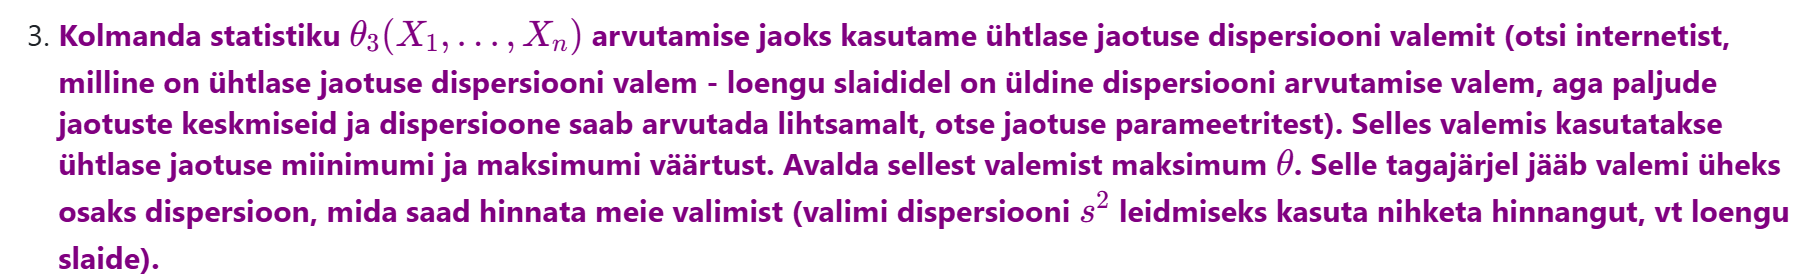


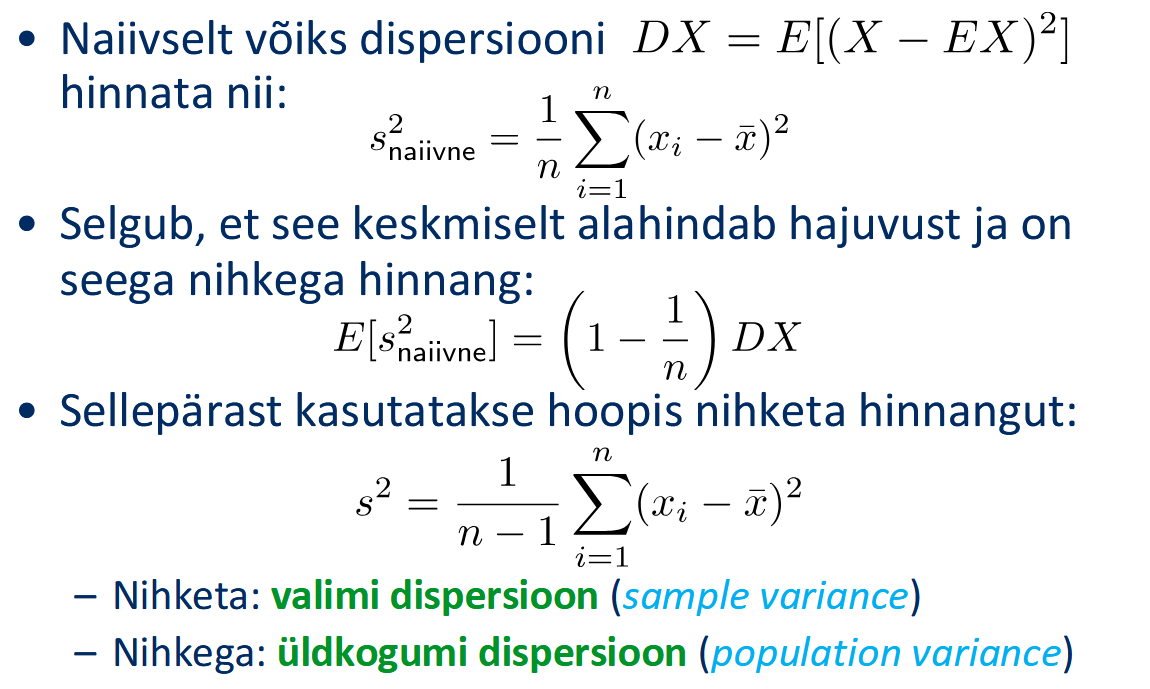


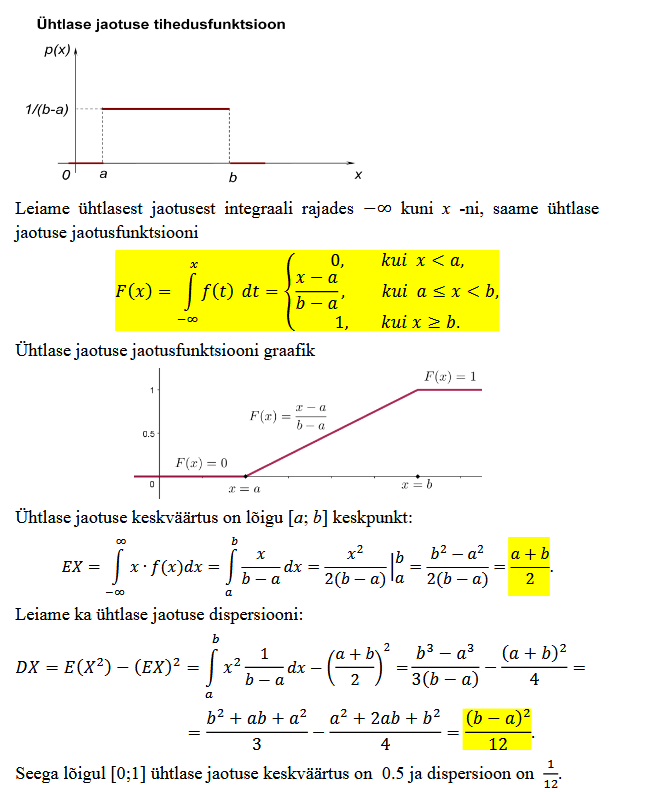


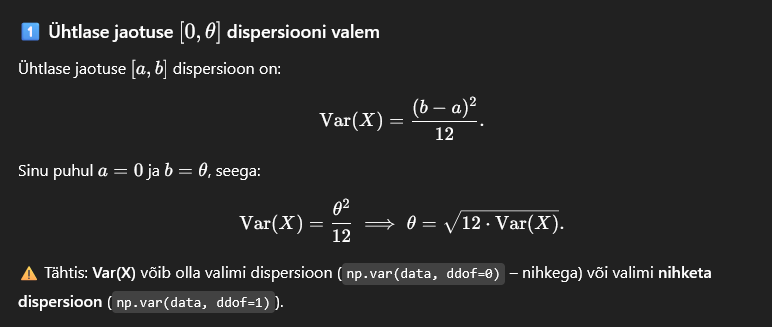

MA KASUTASIN AI ABI!!!! VÄGA PAHA!!!! :'(


In [33]:
# a = 0, b = max(!X1, ... ,!Xn) ja n = 100


pidev_DX = [
	np.var(df['suvaline_arv']),
	((df['suvaline_arv'].max()-0)**2)/12
]

pidev_nihketa_DX = np.var(df['suvaline_arv'], ddof=1)


theta_pidev_nihkega = [
	np.sqrt(12*pidev_DX[0]),
	np.sqrt(12*pidev_DX[1])
]

theta_pidev_nihketa = np.sqrt(12*pidev_nihketa_DX)

print(
	f"Pidev DX (nihkega):\t{pidev_DX}"
	"\n"
	f"Pidev DX (nihketa):\t{pidev_nihketa_DX}"
	"\n"
	f"Theta (nihkega):\t{theta_pidev_nihkega}"
	"\n"
	f"Theta (nihketa):\t{theta_pidev_nihketa}"
)

Pidev DX (nihkega):	[np.float64(0.41721094250920454), np.float64(0.3818393863608842)]
Pidev DX (nihketa):	0.4214681970246046
Theta (nihkega):	[np.float64(2.2375279462188744), np.float64(2.14057764080881)]
Theta (nihketa):	2.2489149304265057


In [34]:
# 4
#	Paku kõhutunde järgi, milline võiks olla nendest kolmest statistikust täpseim ja miks?

df.describe()

,suvaline_arv
count,99.000000
mean,1.056930
std,0.649206
min,0.012248
25%,0.495219
50%,0.952375
75%,1.635289
max,2.140578


(Vastus palun siia)

Ma arvan, et kõik võivad olla õiged, aga kõige õigeb tundub 3.ehk DX järgi saadud väärtus.
Ma arvan et reaalne maksimum võib olla 2.25, kuna ebatõenäoline on, et kui n on väike (n=100), et siis ka maksimum väärtus on andmetes.

iga arvu tulekuks on tn f(x)=1/(b-a) ehk kui b ~= 2.25, siis f(x) = 1/2.25 = 4/9, tegelt kõikidel arvudel on tulekuks sama võimalus.


<font color='purple'>**(b) Järgnevalt uurime eksperimentaalselt, milline kolmest statistikust annab keskeltläbi paremaid tulemusi. Selleks jätame korraks etteantud andmed kõrvale ja uurime hoopis olukorda, kus andmed on genereeritud ühtlasest jaotusest $\operatorname{Uniform}(0,1)$. Sellisel puhul saame uurida, kui lähedale arvule $1$ satuvad keskmiselt hinnangud saaduna kolme ülalkirjeldatud statistikuga.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Genereeri 10000 andmestikku suurusega 100 andmepunkti, jaotusest $\operatorname{Uniform}(0,1)$.**</font>

2. <font color='purple'>**Iga hinnangufunktsiooni jaoks ülaltoodud alapunktist (a) joonista histogramm (kokku 3 - iga hinnangufunktsiooni jaoks üks), mis näitavad vastavalt iga hinnangufunktsiooni väärtuste jaotust neil andmestikel (ehk iga histogrammi tegemisel on kasutusel 10000 hinnangut).**</font>

3. <font color='purple'>**Selgita, mis poolest need histogrammid sarnanevad või erinevad üksteisest ja millest see võiks tingitud olla. Paku histogrammi visuaalse vaatluse põhjal, milline näib parim hinnangufunktsioon ja milline halvim ja miks.**</font>

<font color='purple'>**OODATUD TULEMUS: Kolm histogrammi, üks iga hinnangufunktsiooni kohta. Selgitus, 3-5 lauset. Pakkumine ja põhjendus, 1-3 lauset.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [35]:
rng = np.random.default_rng(0) # siin ja edaspidi seda rida palun mitte eemaldada - see garanteerib, et igal käivitamisel oleks sama tulemus


# Lahendus palun siia (taas võib soovi korral koodivälju juurde teha ja teksti juurde kirjutada).


In [36]:
# 1
# Genereeri 10000 andmestikku suurusega 100 andmepunkti, jaotusest Uniform(0,1).

from scipy.stats import uniform

ühtlane_10k = [uniform.rvs(size=100) for _ in range(10000)]

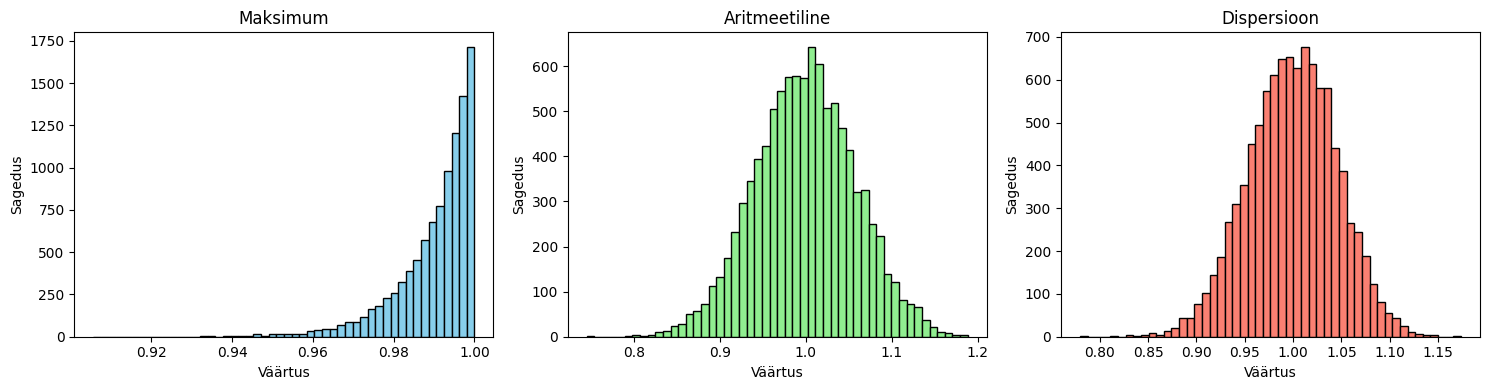

In [37]:
# 2
# 	Iga hinnangufunktsiooni jaoks ülaltoodud alapunktist (a) joonista histogramm (kokku 3 - iga hinnangufunktsiooni jaoks üks), mis näitavad vastavalt iga hinnangufunktsiooni väärtuste jaotust neil andmestikel (ehk iga histogrammi tegemisel on kasutusel 10000 hinnangut).

maksimum = [np.max(ühtlane) for ühtlane in ühtlane_10k]
aritmeetiline = [np.mean(ühtlane) * 2 for ühtlane in ühtlane_10k]
dispersioon = [np.sqrt(12*np.var(ühtlane, ddof=1)) for ühtlane in ühtlane_10k]


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(maksimum, bins=50, color='skyblue', edgecolor='black')
plt.title("Maksimum")
plt.xlabel("Väärtus")
plt.ylabel("Sagedus")

plt.subplot(1, 3, 2)
plt.hist(aritmeetiline, bins=50, color='lightgreen', edgecolor='black')
plt.title("Aritmeetiline")
plt.xlabel("Väärtus")
plt.ylabel("Sagedus")

plt.subplot(1, 3, 3)
plt.hist(dispersioon, bins=50, color='salmon', edgecolor='black')
plt.title("Dispersioon")
plt.xlabel("Väärtus")
plt.ylabel("Sagedus")

plt.tight_layout()
plt.show()

(Vastus palun siia)

Maksimum väärtus tundub kõige täpsem aga siin saad alati arvu mis on veidi väiksem kui 1.

Artimeetilise kesmisega tunudb veidi üle hinnatud ja alahinnatud realset Theta väärtust, mis meil on samas 3 tippu on alla ühe.

Dispersioon tunudb veidi parem kui aritmeetlise keskmisel arvutatud aga ikka pakub üle. ning kaks tippu on üle ühe.


<font color='purple'>**(c) Mõõda 3 hinnangufunktsiooni headust ruutkeskmise veaga MSE punktis (b) genereeritud andmetel. Milline on parim, milline halvim hinnangufunktsioon? Kas läks punktis (b) tehtud pakkumisega kokku või kui mitte, siis mis osutus erinevaks?**</font>

<font color='purple'>**OODATUD TULEMUS: MSE tulemus eraldi igal hinnangufunktsioonil. Milline parim ja milline halvim - 1 lause. Kas läks pakkumisega kokku: 1-3 lauset.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


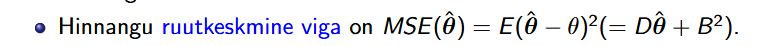


In [38]:
# Lahendus

mse_maksimumiga = np.mean((np.array(maksimum) - 1)**2)
mse_aritmeetiline = np.mean((np.array(aritmeetiline) - 1)**2)
mse_dx = np.mean((np.array(dispersioon) - 1)**2)

print(
	f"MSE maks: \t\t {mse_maksimumiga}"
	"\n"
	f"MSE aritmeetiline: \t {mse_aritmeetiline}"
	"\n"
	f"MSE dispersioon: \t {mse_dx}"
	"\n"
)


MSE maks: 		 0.00019136591335208362
MSE aritmeetiline: 	 0.003389138277652987
MSE dispersioon: 	 0.0020960259375464065



(Vastus palun siia)

parim, maks
havim aritmeetiline

pakkumisega läks üpris kokku


<font color='purple'>**(d) Lähtuvalt eelnevatest alapunktidest teha enda poolt lõplik pakkumine parameetri $\theta$ väärtusele ühega kolmest hinnangufunktsioonist. Põhjendada, miks just see hinnangufunktsioon sai valitud.**</font>

<font color='purple'>**OODATUD TULEMUS: Pakkumine $\theta$ väärtusele: üks reaalarv. Põhjendus: 1-5 lauset.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [39]:
np.max(maksimum)

np.float64(0.9999985517388725)

(Vastus palun siia)

Ma pakun 0.9999994783654494.

Valisin selle kuna sellel oli kõige väiksem MSE.


<font color='purple'>**(e) Punktis (b) joonistatud histogrammidest on näha, et kõik hinnangufunktsioonid paratamatult eksivad natuke ehk $\hat{\theta}\neq 1$ ($\hat{\theta}$'ga tähistame hinnangut päris maksimumile $\theta$).**</font>

-   <font color='purple'>**Nüüd seame eesmärgiks leida punkthinnangu $\hat{\theta}$ asemel vahemikhinnangu, s.t. intervalli mille sisse kuulub jaotuse tegelik maksimum (ehk arv 1) tõenäosusega 98%.**</font>

-   <font color='purple'>**Seda tuntakse kui usaldusvahemikku ehk usaldusintervalli. Meie seame eesmärgiks leida sümmeetriline vahemikhinnang ehk tahame väljastada vahemiku kujul $[(1-x)\hat{\theta},(1+x)\hat{\theta}]$, kus $x$ on mingi väike positiivne reaalarv, $0<x<1$.**</font>

-   <font color='purple'>**Kasutades punktis (d) valitud hinnangufunktsiooni, leia punktis (b) genereeritud andmete põhjal arv $x$ nii, et 98 protsendil andmestikest jääb jaotuse tegelik maksimum ehk arv $1$ vahemikku $[(1-x)\hat{\theta},(1+x)\hat{\theta}]$.**</font>

<font color='purple'>**OODATUD TULEMUS: Reaalarv $x$.**</font>

VIHJED:

-   NB! See ei ole sama mis uurida kui tihti on $\hat{\theta}$ vahemikus $[1-x,1+x]$.
-   10000 andmestiku peal on sul arvutatud oma hinnangufunktsiooniga statistik, ehk 10000 statistiku väärtust. Nüüd valid ühe $x$'i (mis ei muutu üle andmestike) ja arvutad iga statistiku jaoks vahemiku ja vaatad, kui paljudel juhtudel 1 jääb vahemikku.
-   Piisab lahendusest, mis otsingu või katse-eksitus meetodil $x$'i leiab. Ehk võite valida $x$'i, vaadata, mitmel protsendil andmestikest nõutud tingimus kehtib katsetada seni, kuni leiate $x$'i, mille puhul on see piisavalt lähedal 98 protsendile.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [40]:
    #_1_miinus_x = (1-x) * maksimum
    #_1_pluss_x = (1+x) * maksimum
    #sagedus = np.mean((lower <= 1) & (1 <= upper))

In [41]:
# Ma valiksin maksimumi, kuna see on kõige lähedasem realsele Theta väärtusele.

# ma pean võtma nii, et mean oleks x-1 vahemik x+1 = 0.95


päris_x = [None]*2


for x in np.linspace(0, 1, 10000):
	_1_miinus_x = [(1-x)*theta for theta in maksimum]
	_1_pluss_x = [(1+x)*theta for theta in maksimum]
	vahemikku_jäävad = [(miinus <= 1 <= pluss) for miinus, pluss in zip(_1_miinus_x, _1_pluss_x)]
	sagedus = np.mean(vahemikku_jäävad)

	if sagedus >= 0.98:
		päris_x = [x, sagedus]
		break

print(
	f"X-i väärtus: \t\t {päris_x[0]}"
	"\n"
	f"1 jääb vahemikku (%) : \t {päris_x[1]}"
)


X-i väärtus: 		 0.0393039303930393
1 jääb vahemikku (%) : 	 0.98


(Vastus palun siia)


<font color='purple'>
    
**(f) Kasutades punktis (e) leitud väärtust $x$ ja punktis (d) valitud hinnangufunktsiooni, leia algsetele failist `yl2.csv` sisse loetud andmetele 98% sümmeetriline usaldusvahemik $[(1-x)\hat{\theta},(1+x)\hat{\theta}]$. Proovige põhjendada, miks saame punktis (b) genereeritud andmete põhjal leitud väärtust $x$ selliselt kasutusele võtta algsetel andmetel, kus me tegelikku $\theta$ väärtust ei tea.**</font>
    
<font color='purple'>**OODATUD TULEMUS: Vahemik ja põhjendus, miks õige $\theta$ kuulub 98% tõenäosusega sellesse vahemikku (vahemik ja 1-3 lauset).**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [42]:

x = päris_x[0]

theta_yl2 = df["suvaline_arv"].max()

yl2_usaldusvahemik = [
	(1-x)*theta_yl2,
	(1+x)*theta_yl2,
]

print(
	f"Usaldusvahemik on: {yl2_usaldusvahemik[0]} - {yl2_usaldusvahemik[1]}"
)

Usaldusvahemik on: 2.056444526213564 - 2.2247107554040557


In [43]:
#päris_x = [None]*2


#for x in np.linspace(0, 1, 10000):
#	_1_miinus_x = (1-x)*df["suvaline_arv"].max()
#	_1_pluss_x = (1+x)*df["suvaline_arv"].max()
#	vahemikku_jäävad = (_1_miinus_x <= 1 <= _1_pluss_x)
#	sagedus = np.mean(vahemikku_jäävad)

#	if sagedus >= 0.98:
#		päris_x = [x, sagedus]
#		break

#print(
#	f"X-i väärtus: \t\t {päris_x[0]}"
#	"\n"
#	f"1 jääb vahemikku (%) : \t {päris_x[1]}"
#)


Proovige põhjendada, miks saame punktis (b) genereeritud andmete põhjal leitud väärtust $x$ selliselt kasutusele võtta algsetel andmetel, kus me tegelikku $\theta$ väärtust ei tea.\*\*


(Vastus palun siia)

Me kasutame sama uniform jaotust.


## <font color='red'>Enne kodutöö esitamist palun lähtesta kernel uuesti ning jooksuta kogu kood algusest peale korra läbi - selleks on vaja menüüst valida `Kernel` -> `Restart and Run All`.</font>

## Kodutöö tagasiside

Palun vasta nii täpselt kui oskad. See ei muuda mingilgi moel punkte, mille kodutöö eest saad. Nii 0,5 tundi kui 24 tundi on sobivad vastused. Kogutud informatsiooni kasutatakse kodutööde paremaks muutmiseks.

<font color = "red">**Tagasidet saad anda anonüümselt siin [Google Formsis](https://forms.gle/D7wuDHB2fUCN1JM76).**</font>

**<font color='red'>SUUR TÄNU TEHTUD TÖÖ EEST!</font>**
